In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ghar = pd.read_csv(r"C:\Users\PRANAB\Desktop\B.Sc FINAL YR PROJECT\OTHERS\house-prices-advanced-regression-techniques\train.csv")
ghar.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
ghar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
ghar.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
ghar.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:

numerical_feats = ghar.dtypes[ghar.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = ghar.dtypes[ghar.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))


Number of Numerical features:  38
Number of Categorical features:  43


In [7]:

print(ghar[numerical_feats].columns)
print("="*100)
print(ghar[categorical_feats].columns)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

In [8]:
for i in categorical_feats:    
    ghar.drop(i, inplace=True, axis=1)

In [9]:
ghar.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
ghar.shape

(1460, 38)

In [11]:
total = ghar.isnull().sum().sort_values(ascending=False)
percent = (ghar.isnull().sum()/ghar.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
OpenPorchSF,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000
GarageArea,0,0.000000


In [12]:
ghar.drop(['LotFrontage','GarageYrBlt','MasVnrArea'],axis=1,inplace=True)

In [13]:
ghar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

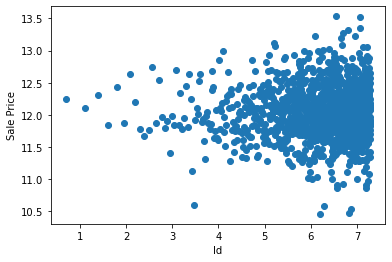

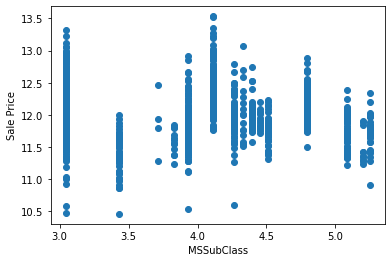

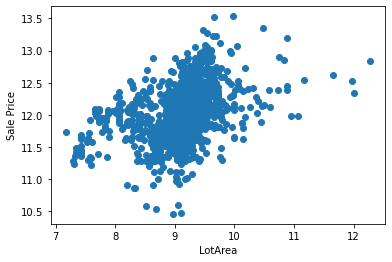

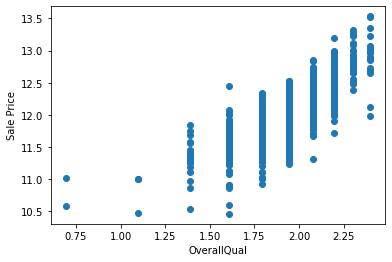

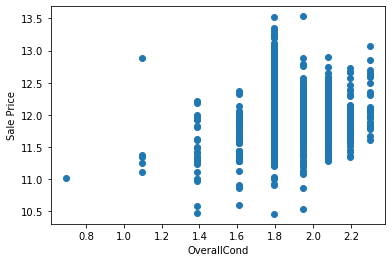

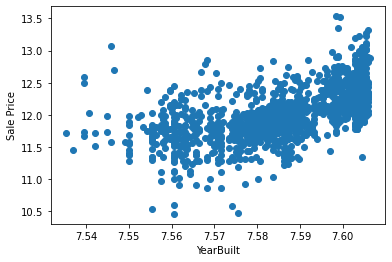

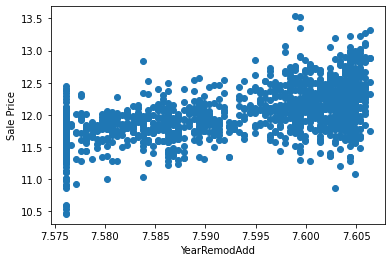

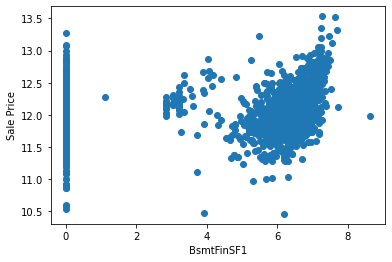

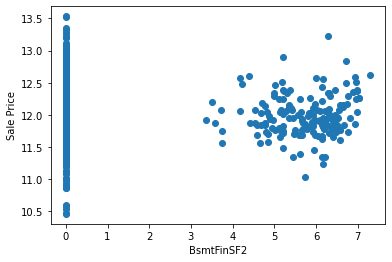

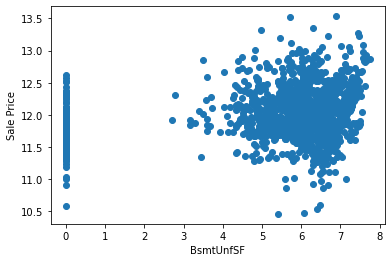

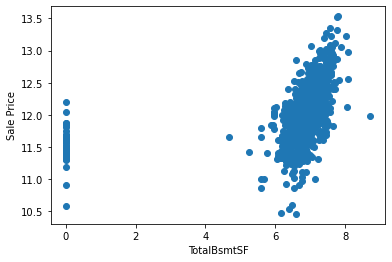

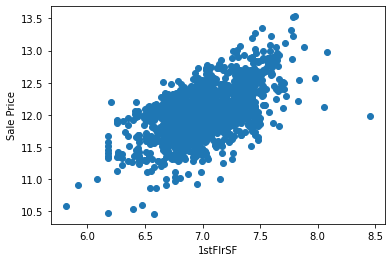

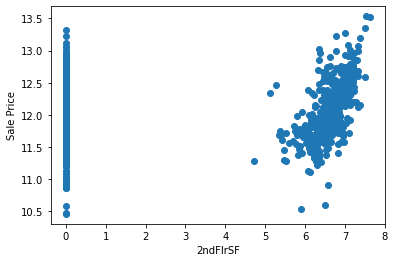

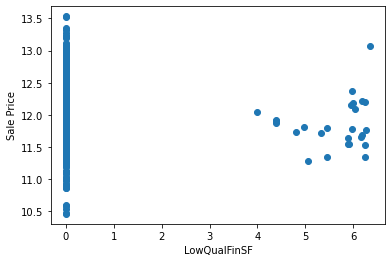

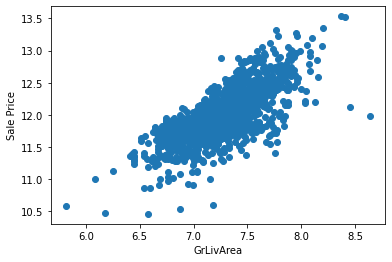

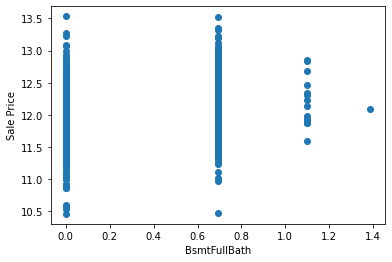

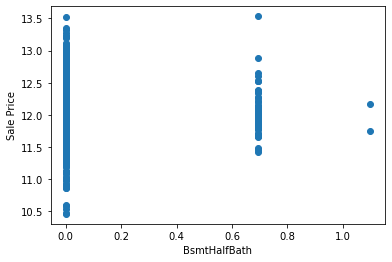

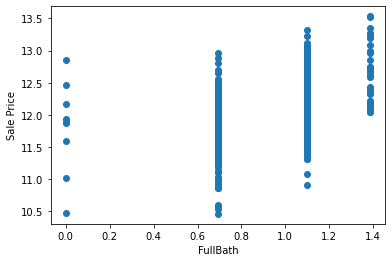

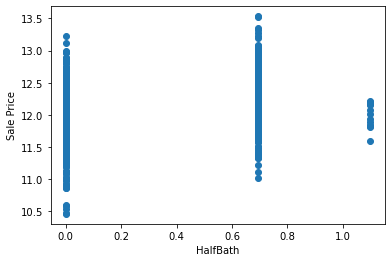

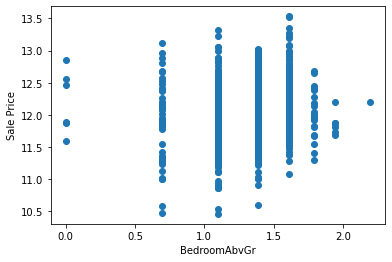

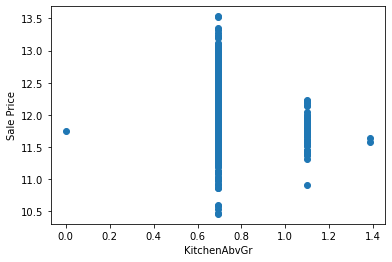

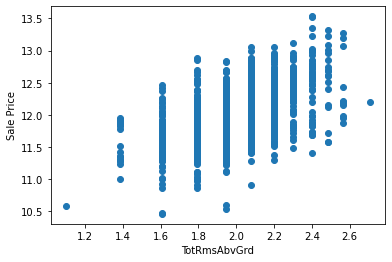

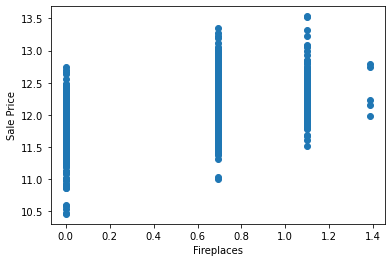

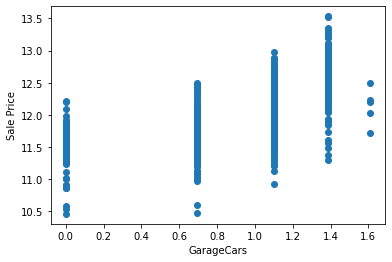

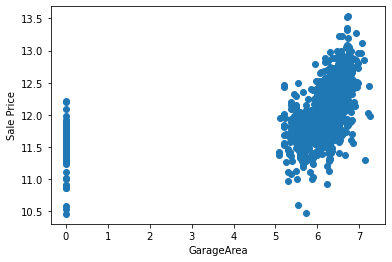

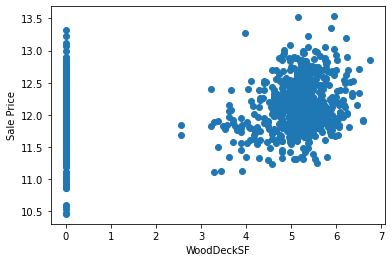

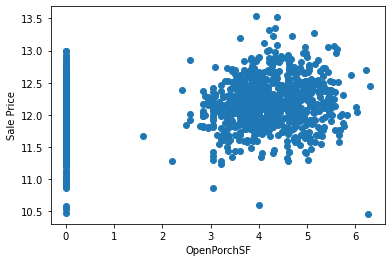

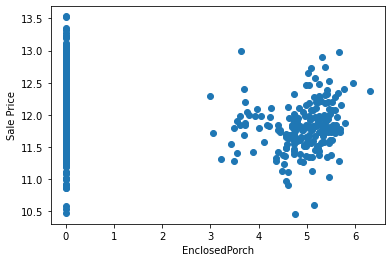

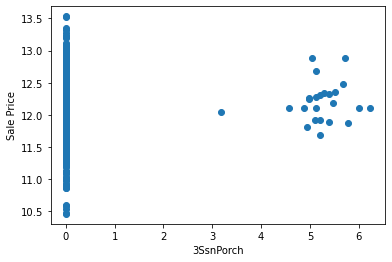

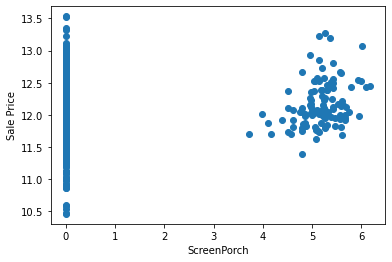

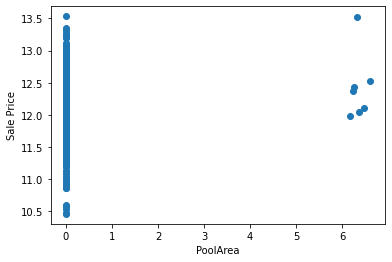

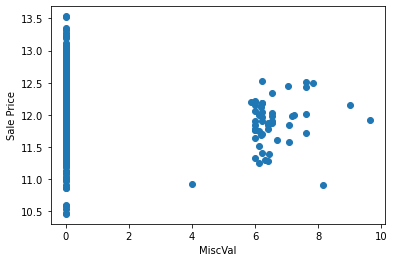

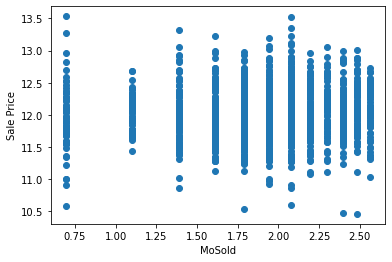

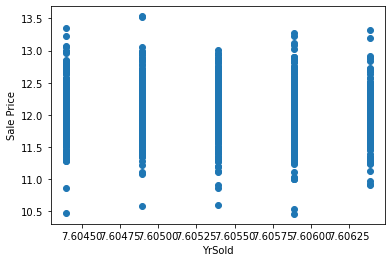

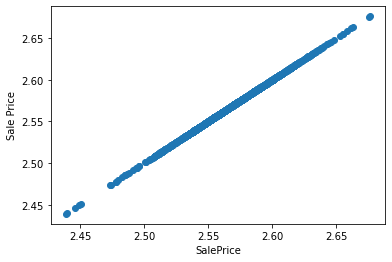

In [14]:
#EDA

features= []
for i in ghar.columns:
    features.append(i)

for feature in features:
    data=ghar.copy()
    data['SalePrice']=np.log(data['SalePrice']+1)
    data[feature]=np.log(data[feature]+1)
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

<AxesSubplot:>

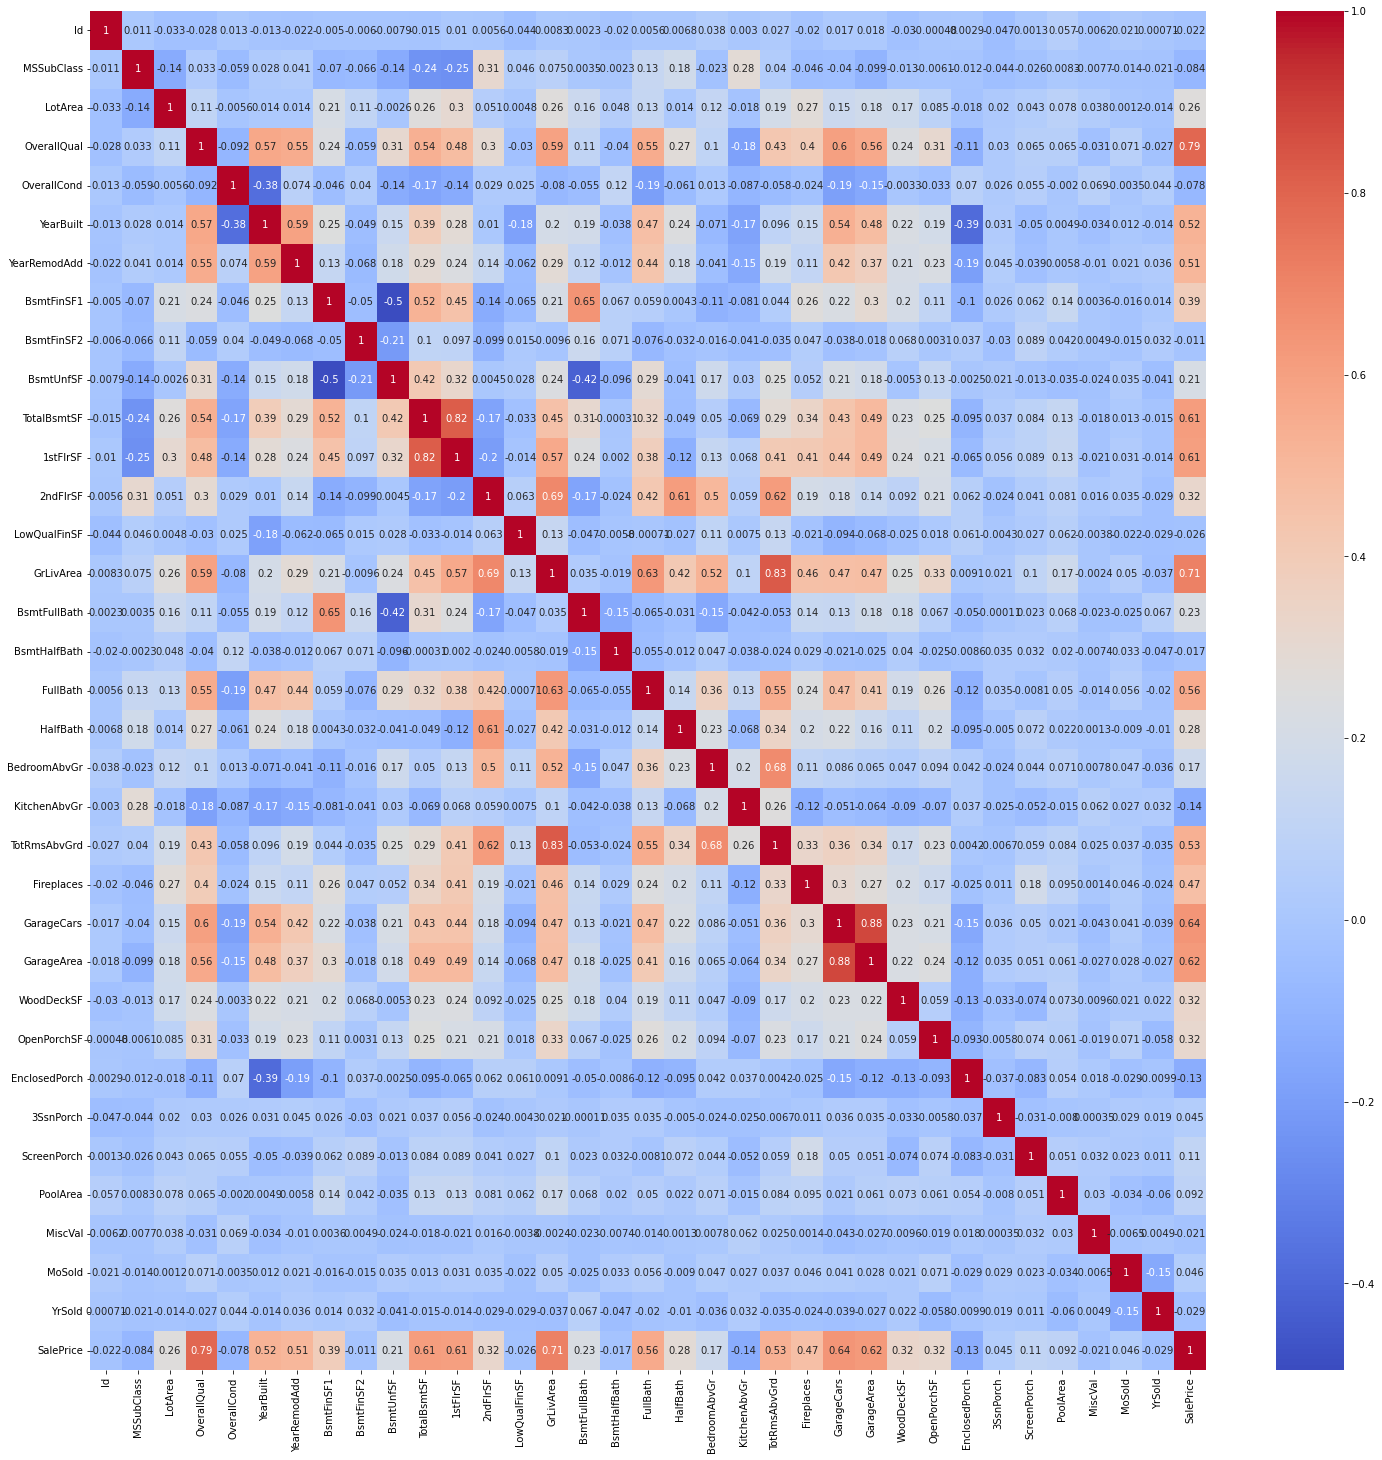

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(ghar.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

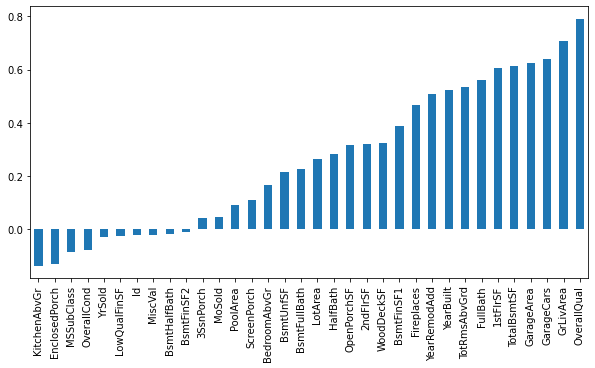

In [16]:
plt.figure(figsize=(10,5))
ghar.corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind='bar')

In [17]:
import warnings
warnings.filterwarnings("ignore")

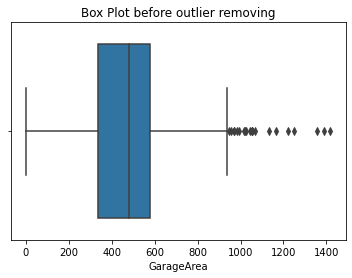

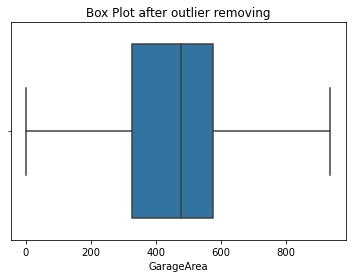

In [18]:
#DATA PREPROCESSING AGAIN OUTLIER

sns.boxplot(ghar['GarageArea'])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(ghar, 'GarageArea')
sns.boxplot(ghar['GarageArea'])
plt.title("Box Plot after outlier removing")
plt.show()


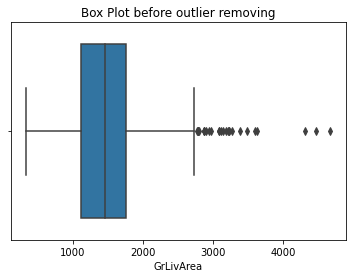

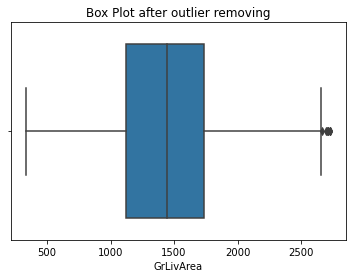

In [19]:

sns.boxplot(ghar['GrLivArea'])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(ghar, 'GrLivArea')
sns.boxplot(ghar['GrLivArea'])
plt.title("Box Plot after outlier removing")
plt.show()


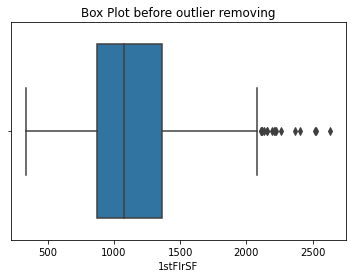

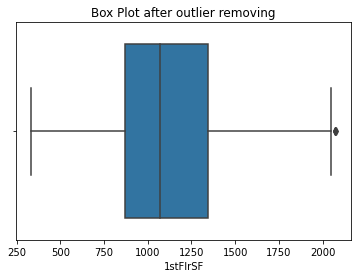

In [20]:

sns.boxplot(ghar['1stFlrSF'])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(ghar, '1stFlrSF')
sns.boxplot(ghar['1stFlrSF'])
plt.title("Box Plot after outlier removing")
plt.show()


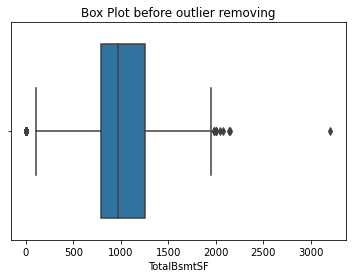

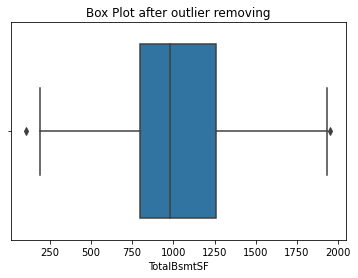

In [21]:

sns.boxplot(ghar['TotalBsmtSF'])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(ghar, 'TotalBsmtSF')
sns.boxplot(ghar['TotalBsmtSF'])
plt.title("Box Plot after outlier removing")
plt.show()


In [22]:
ghar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1347 non-null   int64
 1   MSSubClass     1347 non-null   int64
 2   LotArea        1347 non-null   int64
 3   OverallQual    1347 non-null   int64
 4   OverallCond    1347 non-null   int64
 5   YearBuilt      1347 non-null   int64
 6   YearRemodAdd   1347 non-null   int64
 7   BsmtFinSF1     1347 non-null   int64
 8   BsmtFinSF2     1347 non-null   int64
 9   BsmtUnfSF      1347 non-null   int64
 10  TotalBsmtSF    1347 non-null   int64
 11  1stFlrSF       1347 non-null   int64
 12  2ndFlrSF       1347 non-null   int64
 13  LowQualFinSF   1347 non-null   int64
 14  GrLivArea      1347 non-null   int64
 15  BsmtFullBath   1347 non-null   int64
 16  BsmtHalfBath   1347 non-null   int64
 17  FullBath       1347 non-null   int64
 18  HalfBath       1347 non-null   int64
 19  Bedroo

<AxesSubplot:>

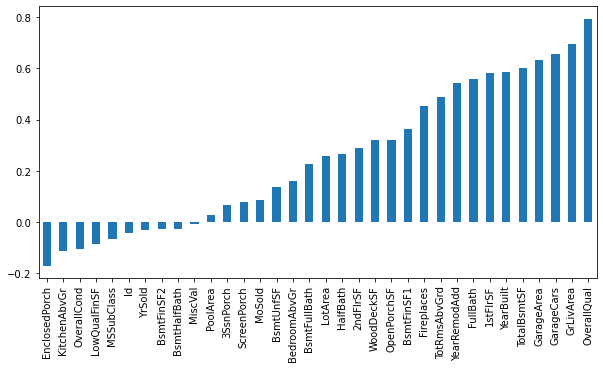

In [23]:
#AGAIN VISUALISATION

plt.figure(figsize=(10,5))
ghar.corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind='bar')

In [24]:
X = ghar.loc[:, ghar.columns!='SalePrice']

y = ghar['SalePrice']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [26]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [27]:
#MODELS
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [28]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:
_____________________________________
MAE: 18031.09994805906
MSE: 654754851.4198682
RMSE: 25588.17796209547
R2 Square 0.8616161915916168
__________________________________
Train set evaluation:
_____________________________________
MAE: 16594.941404038913
MSE: 508797862.3608397
RMSE: 22556.548103839817
R2 Square 0.8728078724387939
__________________________________


In [29]:
#RIDGE
from sklearn.linear_model import Ridge, RidgeCV

In [30]:
alphas = np.geomspace(1e-9, 5, num=100)

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)

print('Ridge Regression:')
print("Alpha =", ridgecv.alpha_)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



results_df_2 = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)

Ridge Regression:
Alpha = 0.03496578933827813
Test set evaluation:
_____________________________________
MAE: 17941.203909029748
MSE: 659197222.3203398
RMSE: 25674.836364042123
R2 Square 0.8606772872028419
__________________________________
Train set evaluation:
_____________________________________
MAE: 16598.578018622953
MSE: 510812130.3043013
RMSE: 22601.1532958896
R2 Square 0.8723043345032797
__________________________________


In [31]:
#LASSO
from sklearn.linear_model import Lasso, LassoCV

In [32]:
lasso = Lasso(max_iter = 100000, normalize = True)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)


test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


print("Alpha =", lassocv.alpha_)

results_df_3 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_3, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 17924.41488047078
MSE: 654162960.59647
RMSE: 25576.609638426864
R2 Square 0.8617412889561131
__________________________________
Train set evaluation:
_____________________________________
MAE: 16622.69823507287
MSE: 513233502.30069155
RMSE: 22654.657408592422
R2 Square 0.871699026425905
__________________________________
Alpha = 11.219410925022853


In [33]:
#XGB
from numpy import loadtxt
from xgboost import XGBRegressor

# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)
# make predictions for test data
#test_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_4 = pd.DataFrame(data=[["XGBRegressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_4, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 17178.648901149852
MSE: 613590323.5517366
RMSE: 24770.755409388235
R2 Square 0.8703164007238927
__________________________________
Train set evaluation:
_____________________________________
MAE: 574.0484452351485
MSE: 628525.4767664843
RMSE: 792.7959868506426
R2 Square 0.9998428776955834
__________________________________


In [35]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_5 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_5, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 15986.833023738873
MSE: 556869679.7667505
RMSE: 23598.086358150962
R2 Square 0.8823044275179215
__________________________________
Train set evaluation:
_____________________________________
MAE: 5893.06822079208
MSE: 72930242.0443673
RMSE: 8539.920494030803
R2 Square 0.9817684913098197
__________________________________


In [36]:
#SVM
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_6 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_6, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 23228.650822315394
MSE: 1136136310.904815
RMSE: 33706.62117306947
R2 Square 0.7598752124812613
__________________________________
Train set evaluation:
_____________________________________
MAE: 21057.707781303285
MSE: 913885321.5834868
RMSE: 30230.536243730225
R2 Square 0.7715418499208946
__________________________________


In [37]:
#ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=128,
              epochs=150)

Epoch 1/150
8/8 [==============================] - 3s 71ms/step - loss: 33732780032.0000 - val_loss: 35857575936.0000
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 33269886976.0000 - val_loss: 35183202304.0000
Epoch 3/150
8/8 [==============================] - 0s 16ms/step - loss: 32395352064.0000 - val_loss: 33806571520.0000
Epoch 4/150
8/8 [==============================] - 0s 18ms/step - loss: 30544420864.0000 - val_loss: 31057078272.0000
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 27205392384.0000 - val_loss: 26103898112.0000
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 21588877312.0000 - val_loss: 18382307328.0000
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 14050291712.0000 - val_loss: 9868837888.0000
Epoch 8/150
8/8 [==============================] - 0s 16ms/step - loss: 8303607808.0000 - val_loss: 6683777536.0000
Epoch 9/150
8/8 [==============================] - 0s 16ms/

Epoch 71/150
8/8 [==============================] - 0s 15ms/step - loss: 1175380608.0000 - val_loss: 1273823488.0000
Epoch 72/150
8/8 [==============================] - 0s 16ms/step - loss: 1278216448.0000 - val_loss: 1271459584.0000
Epoch 73/150
8/8 [==============================] - 0s 15ms/step - loss: 1188852608.0000 - val_loss: 1273189760.0000
Epoch 74/150
8/8 [==============================] - 0s 15ms/step - loss: 1170014976.0000 - val_loss: 1269476864.0000
Epoch 75/150
8/8 [==============================] - 0s 16ms/step - loss: 1274398848.0000 - val_loss: 1282589056.0000
Epoch 76/150
8/8 [==============================] - 0s 16ms/step - loss: 1248697728.0000 - val_loss: 1268508160.0000
Epoch 77/150
8/8 [==============================] - 0s 17ms/step - loss: 1170161792.0000 - val_loss: 1275164288.0000
Epoch 78/150
8/8 [==============================] - 0s 16ms/step - loss: 1167548672.0000 - val_loss: 1266404480.0000
Epoch 79/150
8/8 [==============================] - 0s 17ms/step

8/8 [==============================] - 0s 22ms/step - loss: 1194512768.0000 - val_loss: 1238518912.0000
Epoch 141/150
8/8 [==============================] - 0s 13ms/step - loss: 1184476800.0000 - val_loss: 1239705856.0000
Epoch 142/150
8/8 [==============================] - 0s 12ms/step - loss: 1146255232.0000 - val_loss: 1232619904.0000
Epoch 143/150
8/8 [==============================] - 0s 11ms/step - loss: 1130197760.0000 - val_loss: 1230735360.0000
Epoch 144/150
8/8 [==============================] - 0s 11ms/step - loss: 1118441088.0000 - val_loss: 1234345216.0000
Epoch 145/150
8/8 [==============================] - 0s 10ms/step - loss: 1142465024.0000 - val_loss: 1247106176.0000
Epoch 146/150
8/8 [==============================] - 0s 11ms/step - loss: 1141024768.0000 - val_loss: 1239779584.0000
Epoch 147/150
8/8 [==============================] - 0s 11ms/step - loss: 1176930176.0000 - val_loss: 1231502976.0000
Epoch 148/150
8/8 [==============================] - 0s 10ms/step - lo

In [38]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_7 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_7, ignore_index=True)

32/32 [==============================] - 0s 2ms/step
Test set evaluation:
_____________________________________
MAE: 24946.108772255193
MSE: 1232085008.6104596
RMSE: 35101.068482461604
R2 Square 0.7395962543772652
__________________________________
Train set evaluation:
_____________________________________
MAE: 22945.703991336635
MSE: 985160327.001907
RMSE: 31387.263770547233
R2 Square 0.7537241265149027
__________________________________


<AxesSubplot:title={'center':'MAE VALUES OF DIFFERENT MODELS'}, ylabel='Model'>

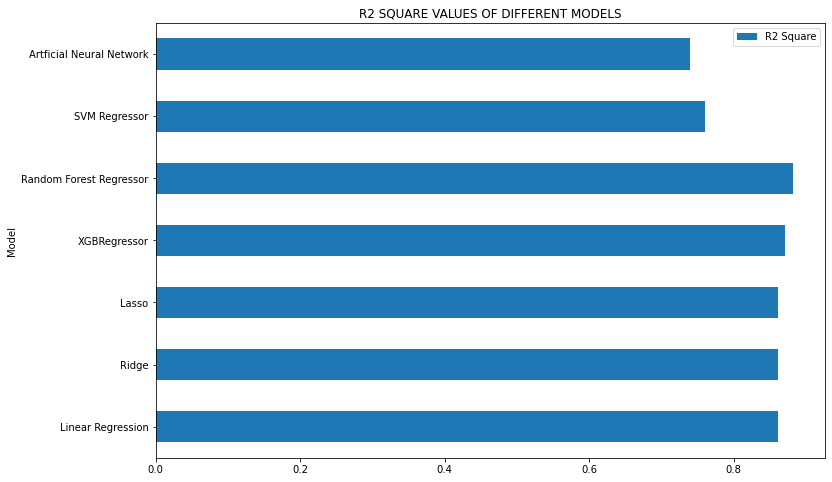

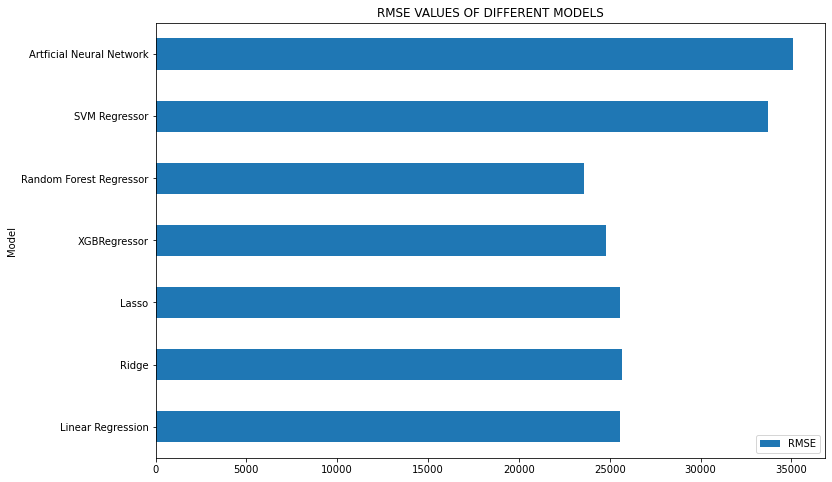

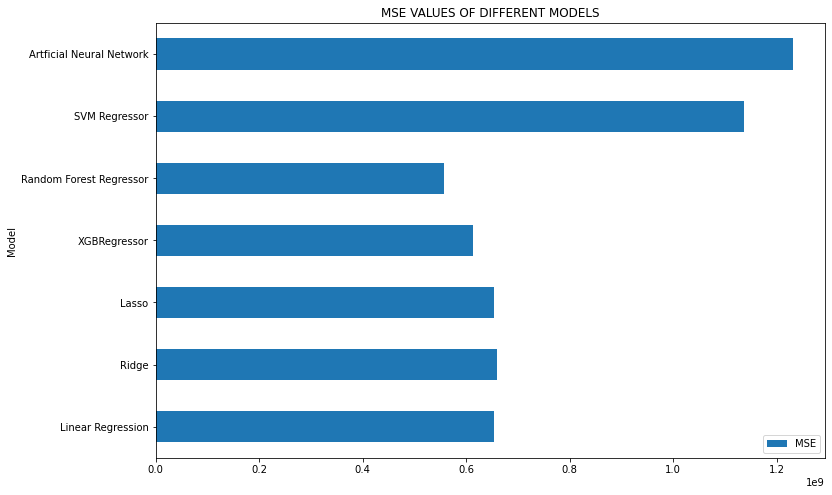

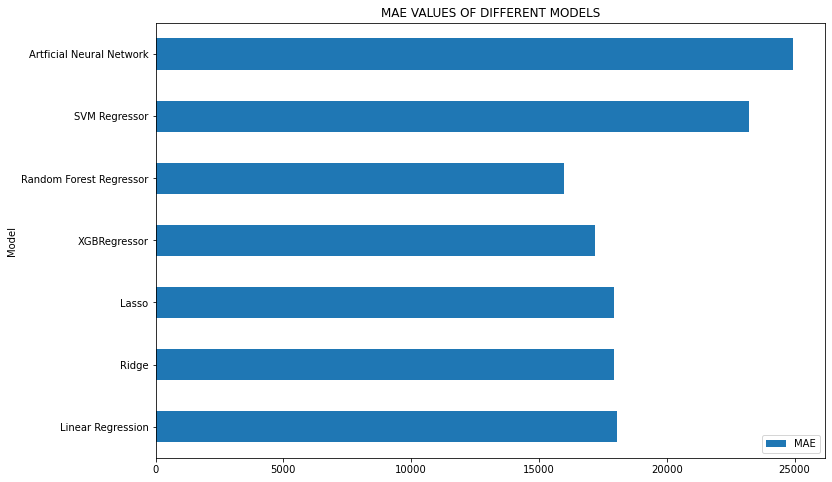

In [39]:
#Models comparision

results_df.plot(x='Model', y='R2 Square', kind='barh', figsize=(12, 8),title="R2 SQUARE VALUES OF DIFFERENT MODELS")

results_df.plot(x='Model', y='RMSE', kind='barh', figsize=(12, 8),title="RMSE VALUES OF DIFFERENT MODELS")

results_df.plot(x='Model', y='MSE', kind='barh', figsize=(12, 8),title="MSE VALUES OF DIFFERENT MODELS")

results_df.plot(x='Model', y='MAE', kind='barh', figsize=(12, 8),title="MAE VALUES OF DIFFERENT MODELS")



In [40]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,18031.099948,6.547549e+08,25588.177962,0.861616
1,Ridge,17941.203909,6.591972e+08,25674.836364,0.860677
2,Lasso,17924.414880,6.541630e+08,25576.609638,0.861741
3,XGBRegressor,17178.648901,6.135903e+08,24770.755409,0.870316
4,Random Forest Regressor,15986.833024,5.568697e+08,23598.086358,0.882304
5,SVM Regressor,23228.650822,1.136136e+09,33706.621173,0.759875
6,Artficial Neural Network,24946.108772,1.232085e+09,35101.068482,0.739596
